In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/SuperMarket Analysis.csv')

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

#summary statistics
print(df.describe())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Sales, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []
        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.1

**Most sold Products**

In [ ]:

most_sold_products = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print("Most Sold Products (by Quantity):")
print(most_sold_products)

Most Sold Products (by Quantity):
Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


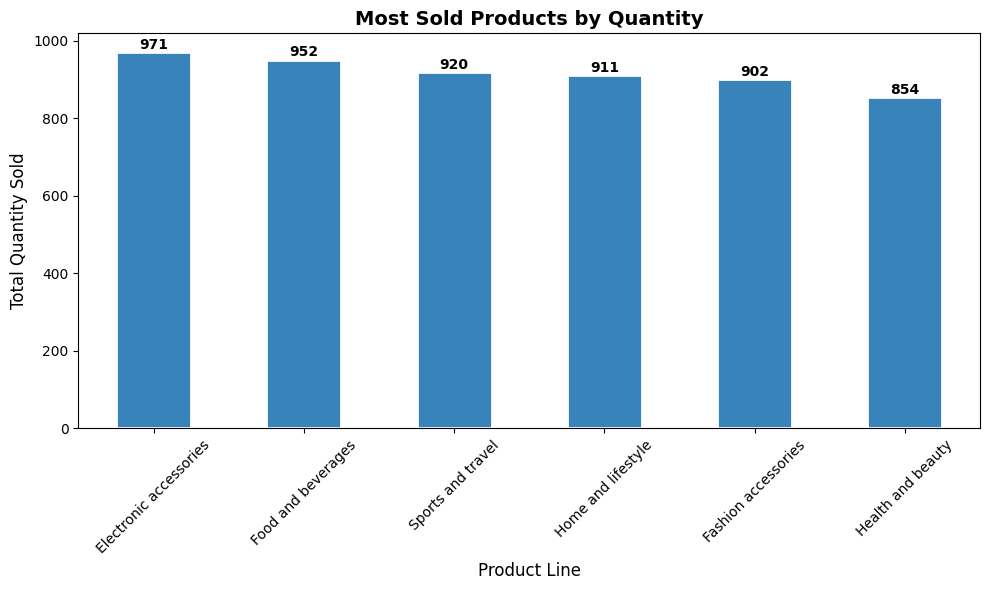

In [ ]:
plt.figure(figsize=(10,6))
bars = most_sold_products.plot(kind='bar', color='#3884BA', edgecolor='white', linewidth=2)
plt.title('Most Sold Products by Quantity', fontsize=14, color='black', weight='bold')
plt.xlabel('Product Line', fontsize=12, color='black')
plt.ylabel('Total Quantity Sold', fontsize=12, color='black')
plt.xticks(rotation=45, color='black', fontsize=10)
plt.yticks(color='black', fontsize=10)
for index, value in enumerate(most_sold_products):
    plt.text(index, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=10, color='black', weight='bold')
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

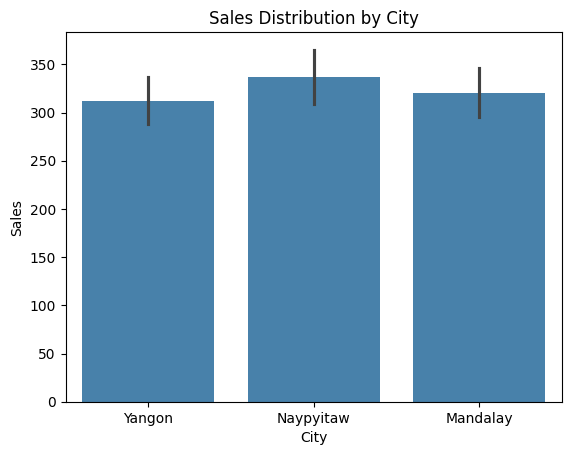

In [ ]:
# Sales Distribution by City
import seaborn as sns
sns.barplot(data=df, x='City', y='Sales',color='#3884BA')
plt.title('Sales Distribution by City')
plt.show()


<ipython-input-25-b73e9e408a65>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



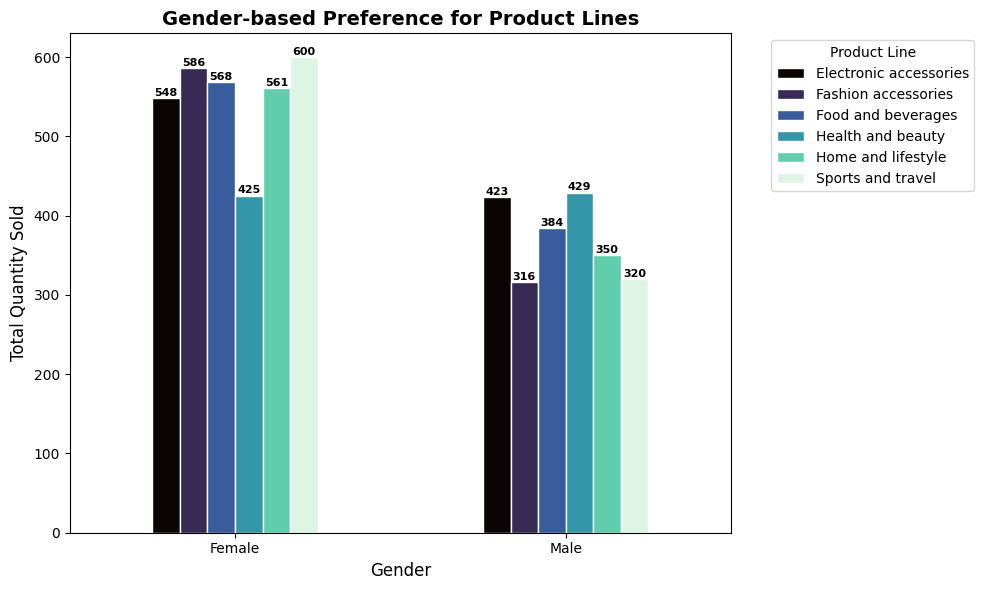

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

gender_preference = df.groupby(['Gender', 'Product line'])['Quantity'].sum().unstack()

# Generate a colormap with enough distinct colors
cmap = cm.get_cmap('mako', len(gender_preference.columns))  # Replace 'viridis' with your preferred colormap
colors = [cmap(i) for i in range(len(gender_preference.columns))]

# Plotting the grouped bar chart
ax = gender_preference.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='white')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='bottom', fontsize=8, color='black', weight='bold')

# Styling the plot
plt.title('Gender-based Preference for Product Lines', fontsize=14, color='black', weight='bold')
plt.xlabel('Gender', fontsize=12, color='black')
plt.ylabel('Total Quantity Sold', fontsize=12, color='black')
plt.xticks(rotation=0, color='black', fontsize=10)
plt.yticks(color='black', fontsize=10)

# Add legend
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')



# Setting a white background for the figure
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

<ipython-input-9-aaf3dcf48bf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Sales', palette='Set2')


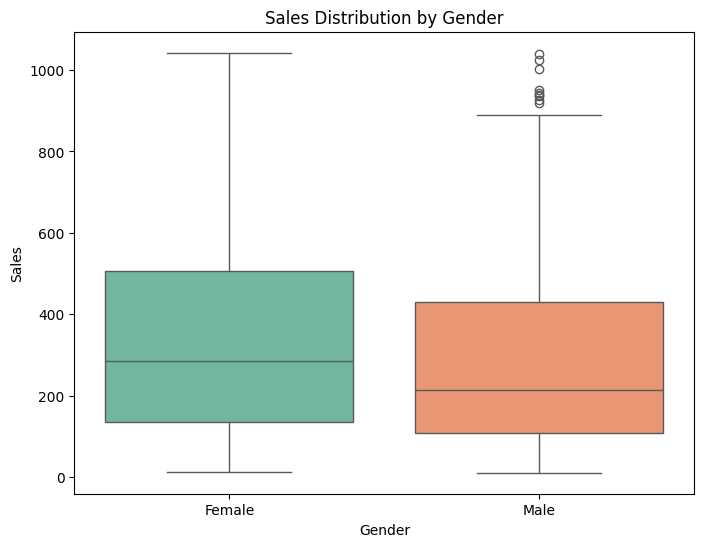

In [ ]:
# Gender Based Sales Analysis
# Boxplot: Sales by Gender
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Sales', palette='Set2')
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()


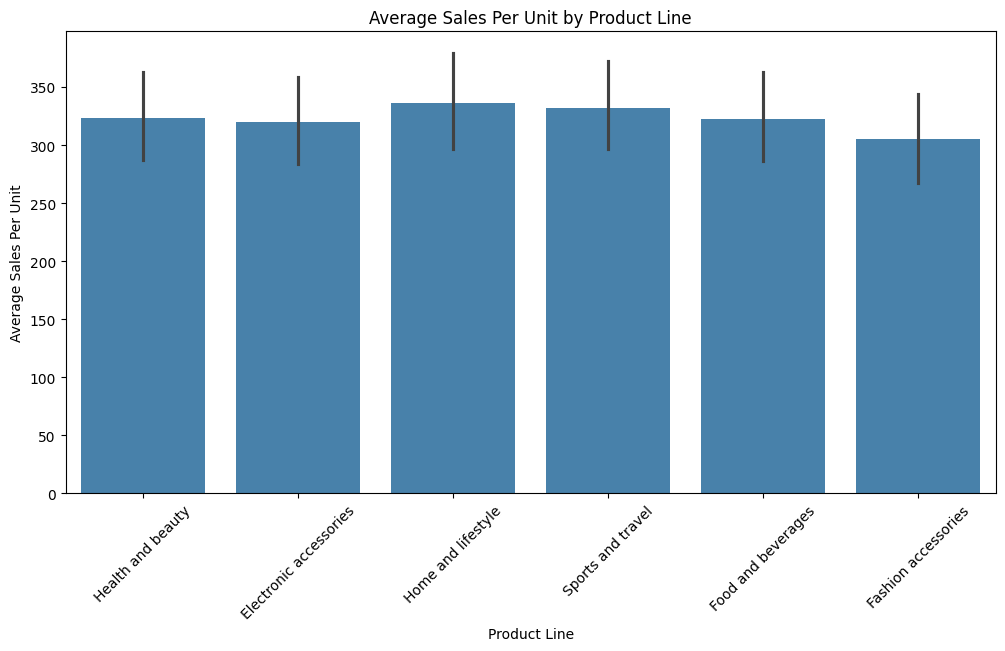

In [ ]:
# Average Sales Per Unit Across Product Lines
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product line', y='Sales', color='#3884BA')
plt.title('Average Sales Per Unit by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Average Sales Per Unit')
plt.show()

**Daily sales analysis**

In [ ]:
import plotly.express as px
df_date_sales_sum = df.groupby('Date').agg({'Sales':'sum'}).reset_index()
fig = px.line(df_date_sales_sum, x='Date', y='Sales', markers=True, color_discrete_sequence=['#3884BA'] )
fig.update_xaxes(
    ticks="outside",              # Ticks outside the axis line
    ticklen=10,                   # Length of the ticks
    tickwidth=2,                  # Width of the ticks
    tickcolor='blue',             # Color of the ticks
    title="Date of Sales",        # Custom title for x-axis
    title_font={"size": 16},      # Title font size
    title_standoff=15,            # Space between title and axis
    showgrid=True,                # Show gridlines
    gridcolor='lightgrey',        # Gridline color
    linecolor='black',            # Axis line color
    linewidth=2,                  # Axis line width
    tickangle=90
    )
fig.show()

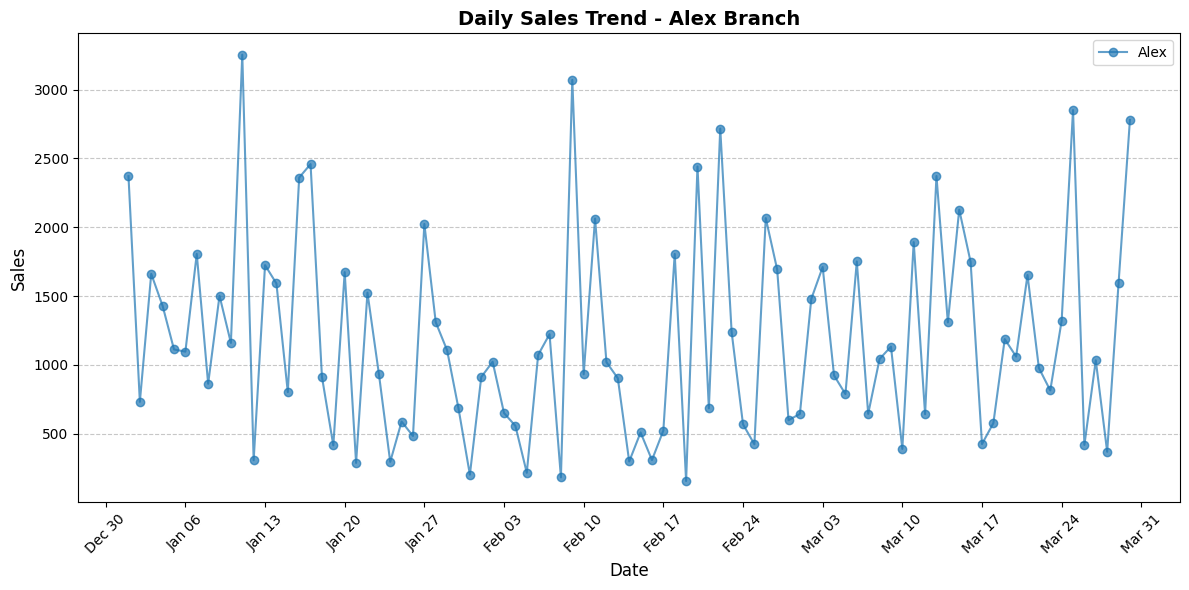

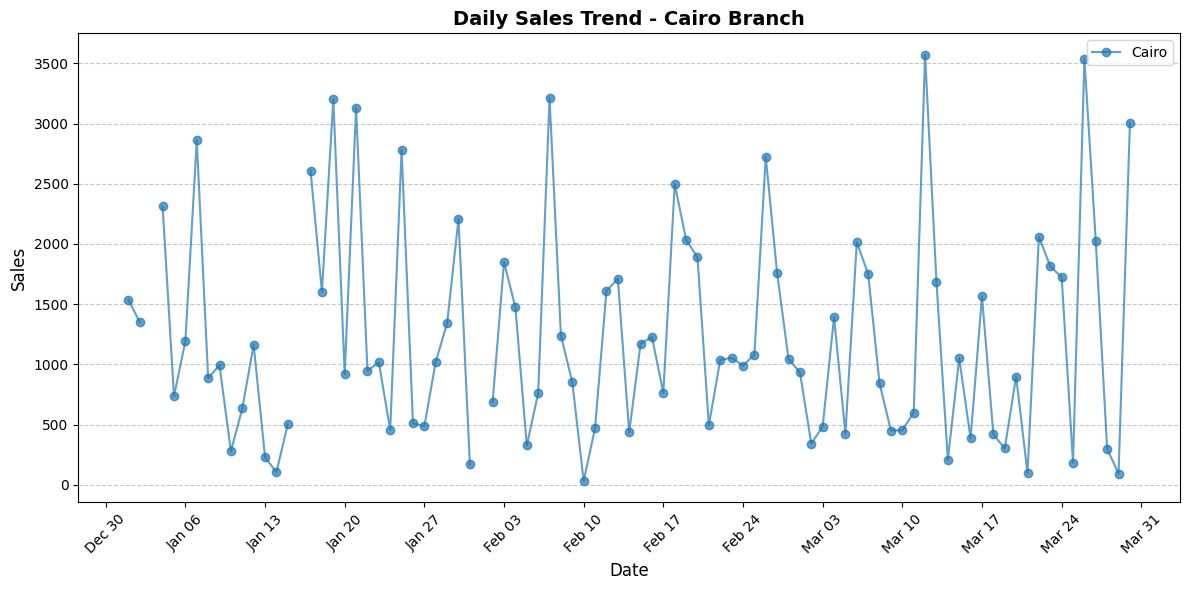

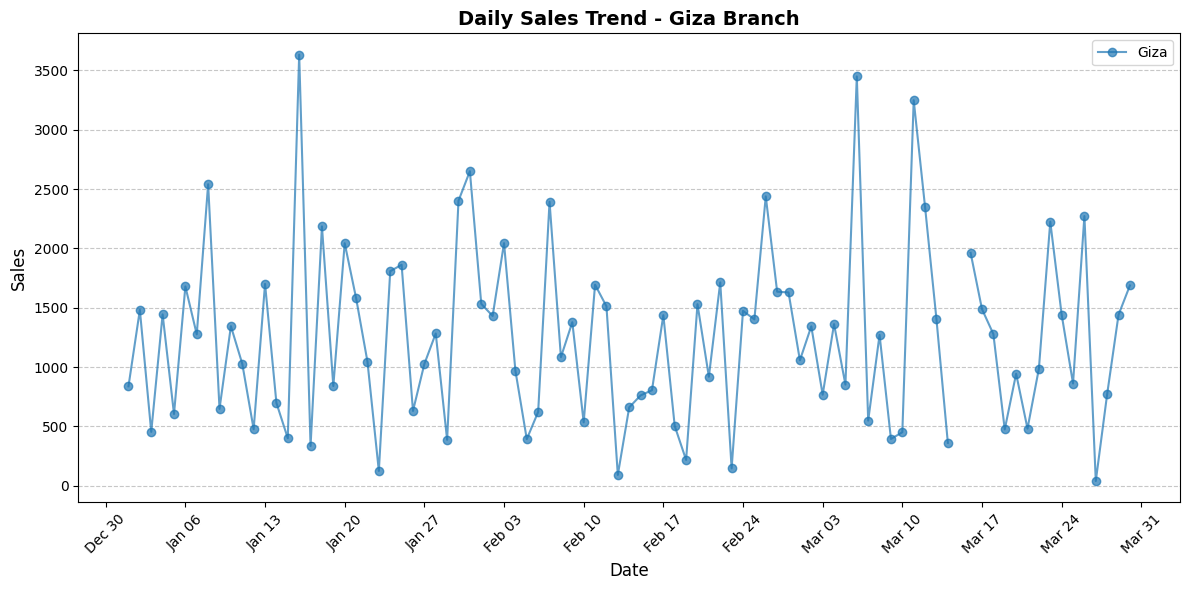

In [ ]:
import matplotlib.dates as mdates

# Aggregate daily sales by branch
daily_sales_by_branch = df.groupby(['Date', 'Branch'])['Sales'].sum().unstack()

# Plot daily sales trend for each branch separately
branches = daily_sales_by_branch.columns

for branch in branches:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales_by_branch.index, daily_sales_by_branch[branch], marker='o', linestyle='-', label=branch, alpha=0.7)
    plt.title(f'Daily Sales Trend - {branch} Branch', fontsize=14, weight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)

    # Format x-axis ticks
    plt.xticks(rotation=45, fontsize=10)
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show ticks weekly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format ticks as 'Month Day'

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

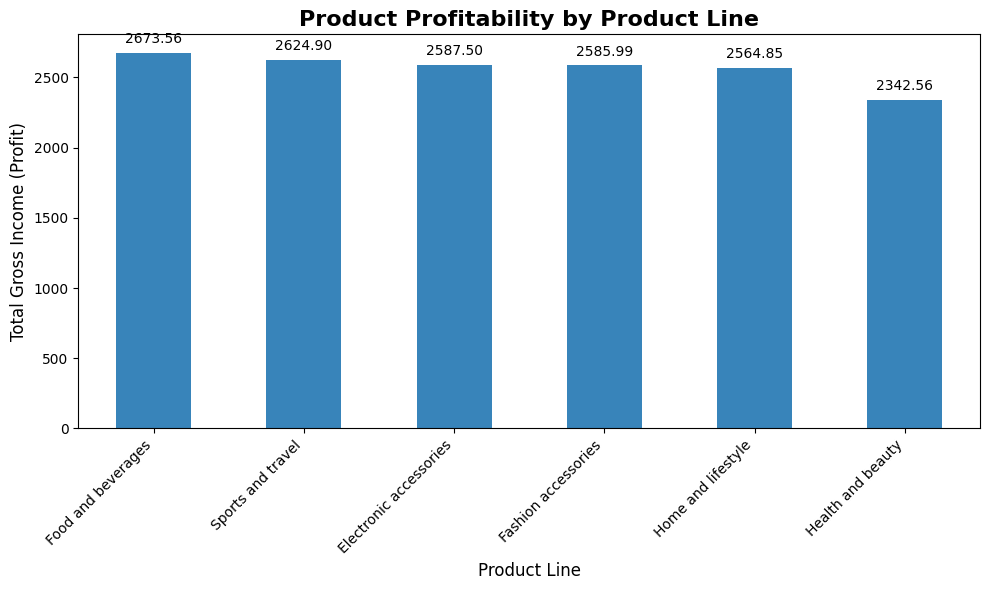

In [ ]:
#Sample DataFrame (assuming df contains your data with 'Product line' and 'gross income')
# Group by 'Product line' and sum the 'gross income' to calculate profitability
product_profitability = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

# Plotting the product profitability
plt.figure(figsize=(10, 6))
ax = product_profitability.plot(kind='bar', color='#3884BA')

# Adding labels and title
plt.title('Product Profitability by Product Line', fontsize=16, color='black', weight='bold')
plt.xlabel('Product Line', fontsize=12, color='black')
plt.ylabel('Total Gross Income (Profit)', fontsize=12, color='black')

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Customize the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Show plot
plt.tight_layout()
plt.show()

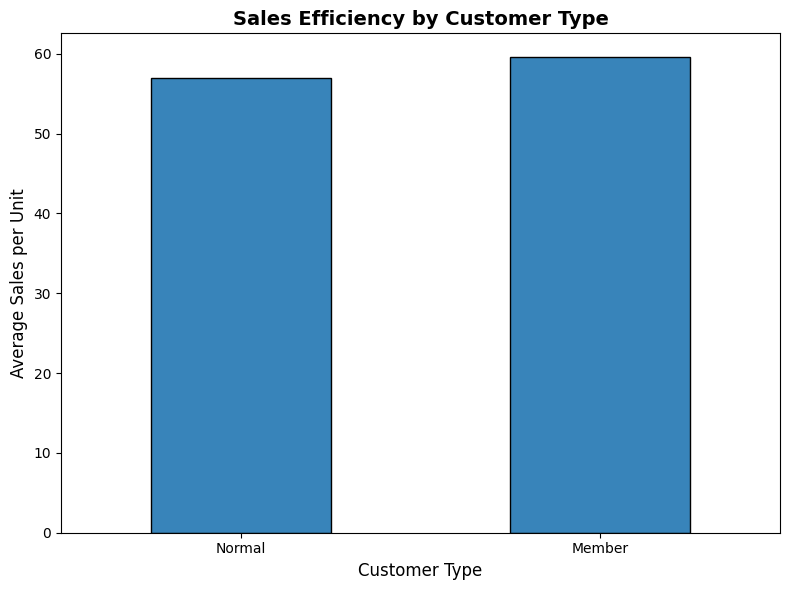

In [ ]:
import matplotlib.pyplot as plt

# Visualize Sales Efficiency by Customer Type
df['Sales per Unit'] = df['Sales'] / df['Quantity']
sales_efficiency_by_customer = df.groupby('Customer type')['Sales per Unit'].mean()
plt.figure(figsize=(8, 6))
sales_efficiency_by_customer.sort_values().plot(kind='bar', color='#3884BA', edgecolor='black')
plt.title('Sales Efficiency by Customer Type', fontsize=14, weight='bold')
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Average Sales per Unit', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

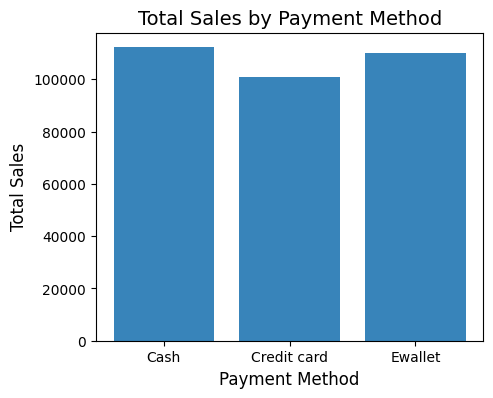

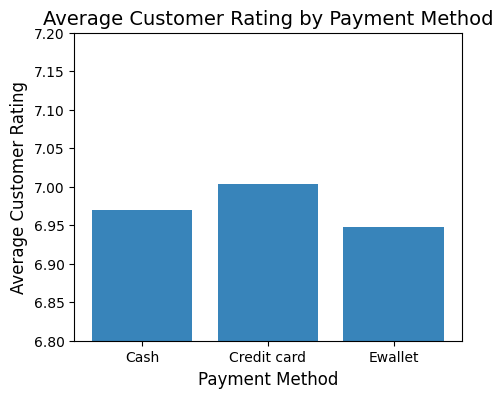

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'SuperMarket Analysis.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Perform payment method analysis
payment_method_analysis = data.groupby("Payment").agg(
    Total_Sales=("Sales", "sum"),
    Average_Sales=("Sales", "mean"),
    Total_Transactions=("Invoice ID", "count"),
    Average_Rating=("Rating", "mean")
).reset_index()

# Rename columns for better readability
payment_method_analysis.columns = [
    "Payment Method",
    "Total Sales",
    "Average Sales per Transaction",
    "Total Transactions",
    "Average Customer Rating"
]

# Plot total sales by payment method
plt.figure(figsize=(5, 4))
plt.bar(payment_method_analysis["Payment Method"], payment_method_analysis["Total Sales"], color="#3884BA")
plt.title("Total Sales by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plot average customer rating by payment method
plt.figure(figsize=(5, 4))
plt.bar(payment_method_analysis["Payment Method"], payment_method_analysis["Average Customer Rating"], color="#3884BA")
plt.title("Average Customer Rating by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Average Customer Rating", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(6.8, 7.2)  # Focus on the range of ratings for better visualization
plt.show()

**Hypothesis Testing: Gender-Based Sales Differences**               
*Null Hypothesis (H₀)*: There is no significant difference in total sales between male and female customers.                                                           
*Alternative Hypothesis (H₁*): Male and female customers have
significantly different total sales.

In [ ]:
#ANOVA test
from scipy.stats import f_oneway

# ANOVA Test for Sales by Gender
male_sales = df[df['Gender'] == 'Male']['Sales']
female_sales = df[df['Gender'] == 'Female']['Sales']

anova_stat, anova_p_value = f_oneway(male_sales, female_sales)
print("ANOVA Test Results:")
print("F-statistic:", anova_stat)
print("p-value:", anova_p_value)

# Interpretation
if anova_p_value < 0.05:
    print("Reject Null Hypothesis: Gender shows a statistically significant difference in sales.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in sales between genders.")



ANOVA Test Results:
F-statistic: 7.148527103165991
p-value: 0.007625077102771033
Reject Null Hypothesis: Gender shows a statistically significant difference in sales.


A p-value less than 0.05 indicates a statistically significant difference in sales between male and female customers. If the p-value is 0.008, this supports the claim that gender influences purchasing behavior.

**Hypothesis Testing: Average Sales Per Unit across product Lines**

*Null Hypothesis (H₀)*: Average sales per unit are the same across all product lines.

*Alternative Hypothesis (H₁*): Average sales per unit differ across product lines.

In [ ]:
from scipy.stats import f_oneway

# ANOVA Test
anova_stat, anova_p_value = f_oneway(
    df[df['Product line'] == 'Electronic accessories']['Sales'],
    df[df['Product line'] == 'Home and lifestyle']['Sales'],
    df[df['Product line'] == 'Health and beauty']['Sales'],
    df[df['Product line'] == 'Sports and travel']['Sales'],
    df[df['Product line'] == 'Food and beverages']['Sales'],
    df[df['Product line'] == 'Fashion accessories']['Sales']
)
print("ANOVA Test Results for Avg Sales Per Unit Across Product Lines:")
print("F-statistic:", anova_stat)
print("p-value:", anova_p_value)

# Interpretation
if anova_p_value < 0.05:
    print("Reject Null Hypothesis: Average sales per unit are the same across all product lines")
else:
    print("Fail to Reject Null Hypothesis: No significant difference")


ANOVA Test Results for Avg Sales Per Unit Across Product Lines:
F-statistic: 0.33796475446188023
p-value: 0.8900398045912835
Fail to Reject Null Hypothesis: No significant difference


 A p-value < 0.05 indicates significant differences in average sales per unit across product lines.

In [ ]:
# Calculate sales efficiency metrics
df['Sales per Unit'] = df['Sales'] / df['Quantity']

# 1. Average Sales per Unit by Product Line
sales_efficiency_by_product = df.groupby('Product line')['Sales per Unit'].mean()

# 2. Average Sales per Unit by Branch
sales_efficiency_by_branch = df.groupby('Branch')['Sales per Unit'].mean()

# 3. Average Sales per Unit by Customer Type
sales_efficiency_by_customer = df.groupby('Customer type')['Sales per Unit'].mean()



In [ ]:
print("1. Average Sales per Unit by Product Line:")
print(sales_efficiency_by_product)

1. Average Sales per Unit by Product Line:
Product line
Electronic accessories    56.229168
Fashion accessories       60.011334
Food and beverages        58.809293
Health and beauty         57.597197
Home and lifestyle        58.082784
Sports and travel         59.842916
Name: Sales per Unit, dtype: float64


MAE: 60.715787207031255
MSE: 6384.434264979716
R^2: 0.9048481668777395


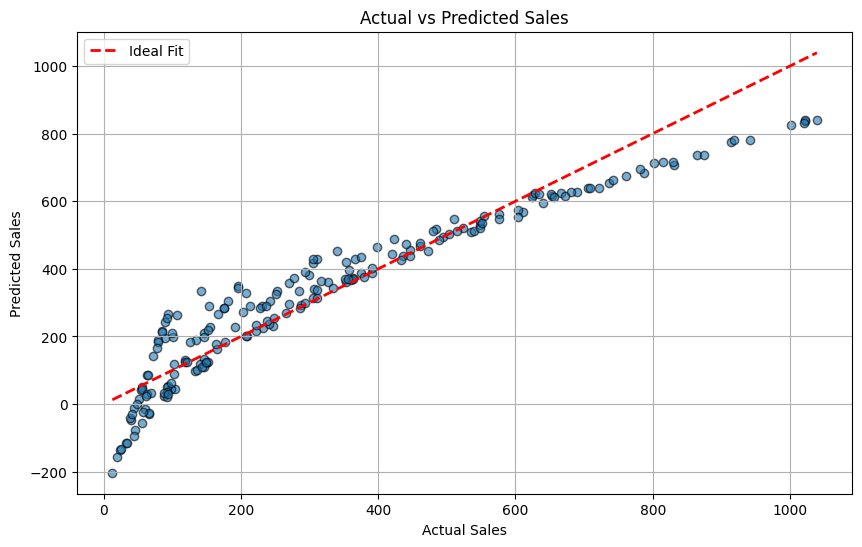

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'SuperMarket Analysis.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# One-hot encode the Product line feature
data_encoded = pd.get_dummies(data, columns=['Product line'], drop_first=True)

# Feature Engineering
data_encoded['Sales per Unit'] = data_encoded['Sales'] / data_encoded['Quantity']
data_encoded['Income Ratio'] = data_encoded['gross income'] / data_encoded['Sales']

# Extract day of the week from the 'Date' column
data_encoded['Date'] = pd.to_datetime(data_encoded['Date'])
data_encoded['Day of Week'] = data_encoded['Date'].dt.dayofweek

# Extract time of day from the 'Time' column
data_encoded['Time'] = pd.to_datetime(data_encoded['Time'], format='%I:%M:%S %p')
data_encoded['Hour'] = data_encoded['Time'].dt.hour
data_encoded['Time of Day'] = pd.cut(
    data_encoded['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False
)
data_encoded = pd.get_dummies(data_encoded, columns=['Time of Day'], drop_first=True)

# Define refined features for Sales prediction
encoded_product_line_features = [
    'Product line_Fashion accessories',
    'Product line_Food and beverages',
    'Product line_Health and beauty',
    'Product line_Home and lifestyle',
    'Product line_Sports and travel'
]

features_for_sales_refined = [
    'Unit price', 'Quantity', 'Sales per Unit', 'Income Ratio', 'Day of Week'
] + encoded_product_line_features + [
    'Time of Day_Morning', 'Time of Day_Afternoon', 'Time of Day_Evening'
]

X_sales_refined = data_encoded[features_for_sales_refined]
y_sales_refined = data_encoded['Sales']

# Split the dataset
X_train_sales_ref, X_test_sales_ref, y_train_sales_ref, y_test_sales_ref = train_test_split(
    X_sales_refined, y_sales_refined, test_size=0.2, random_state=30
)

# Fit the Linear Regression model
sales_model_refined = LinearRegression()
sales_model_refined.fit(X_train_sales_ref, y_train_sales_ref)

# Predictions and Evaluation
y_pred_sales_ref = sales_model_refined.predict(X_test_sales_ref)
mae_sales_ref = mean_absolute_error(y_test_sales_ref, y_pred_sales_ref)
mse_sales_ref = mean_squared_error(y_test_sales_ref, y_pred_sales_ref)
r2_sales_ref = r2_score(y_test_sales_ref, y_pred_sales_ref)

print(f"MAE: {mae_sales_ref}")
print(f"MSE: {mse_sales_ref}")
print(f"R^2: {r2_sales_ref}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sales_ref, y_pred_sales_ref, alpha=0.6, edgecolor='k')
plt.plot([y_test_sales_ref.min(), y_test_sales_ref.max()],
         [y_test_sales_ref.min(), y_test_sales_ref.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

                             Feature   Coefficient  Absolute Coefficient
1                           Quantity  5.826359e+01          5.826359e+01
8    Product line_Home and lifestyle  7.625423e+00          7.625423e+00
6    Product line_Food and beverages  5.654566e+00          5.654566e+00
7     Product line_Health and beauty -4.873646e+00          4.873646e+00
2                     Sales per Unit  2.900673e+00          2.900673e+00
0                         Unit price  2.762546e+00          2.762546e+00
11             Time of Day_Afternoon  2.753168e+00          2.753168e+00
10               Time of Day_Morning -2.749992e+00          2.749992e+00
5   Product line_Fashion accessories  2.287139e+00          2.287139e+00
9     Product line_Sports and travel -2.057458e+00          2.057458e+00
4                        Day of Week -8.494101e-02          8.494101e-02
12               Time of Day_Evening -3.176554e-03          3.176554e-03
3                       Income Ratio -3.593569e-18 

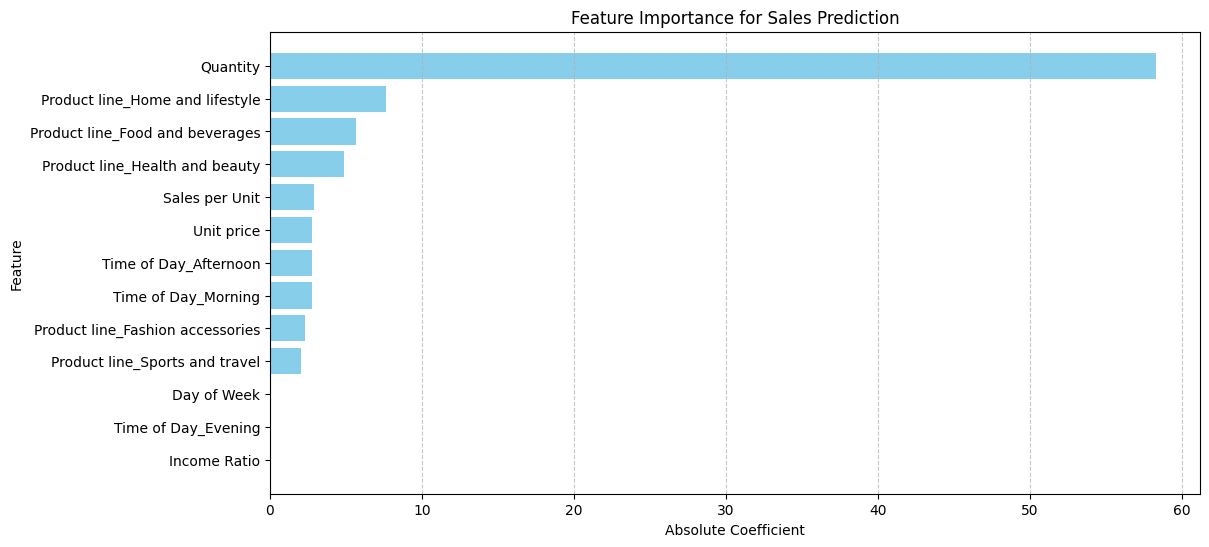

In [ ]:
# Extract feature coefficients from the trained linear regression model
feature_coefficients = sales_model_refined.coef_  # Coefficients from the Linear Regression model
feature_names = X_sales_refined.columns           # Feature names from the dataset

# Combine feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_coefficients
})

# Calculate absolute value of coefficients to determine feature importance
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Sort features by the absolute value of coefficients in descending order
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Sales Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

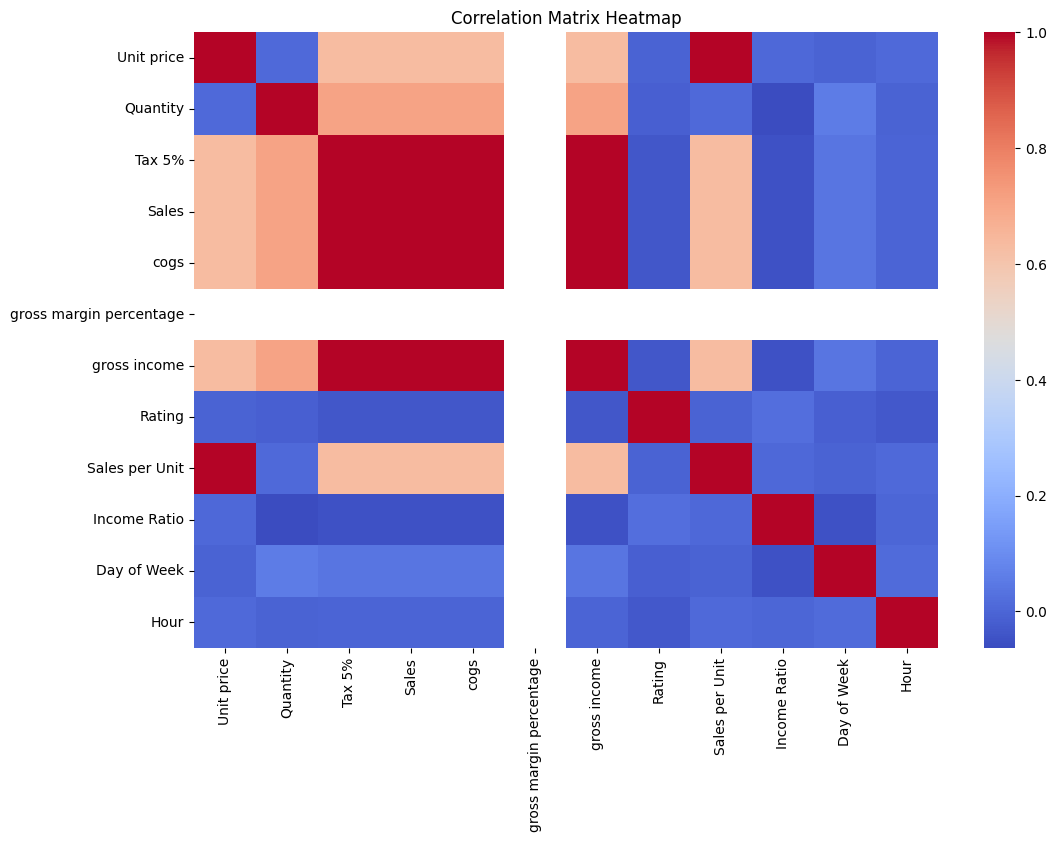

Strong Correlations Between Features:
       Feature 1       Feature 2  Correlation
8     Unit price  Sales per Unit     1.000000
30        Tax 5%    gross income     1.000000
28        Tax 5%            cogs     1.000000
54          cogs    gross income     1.000000
27        Tax 5%           Sales     1.000000
42         Sales    gross income     1.000000
40         Sales            cogs     1.000000
14      Quantity          Tax 5%     0.705510
18      Quantity    gross income     0.705510
15      Quantity           Sales     0.705510
16      Quantity            cogs     0.705510
32        Tax 5%  Sales per Unit     0.633962
80  gross income  Sales per Unit     0.633962
44         Sales  Sales per Unit     0.633962
56          cogs  Sales per Unit     0.633962
3     Unit price           Sales     0.633962
6     Unit price    gross income     0.633962
2     Unit price          Tax 5%     0.633962
4     Unit price            cogs     0.633962


In [ ]:
# Filter numeric columns
numeric_data = data_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Extract strong correlations (threshold > 0.5 or < -0.5)
strong_correlations = correlation_matrix.unstack().reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter strong correlations and remove self-correlations
strong_correlations = strong_correlations[
    (strong_correlations['Feature 1'] != strong_correlations['Feature 2']) &
    (strong_correlations['Correlation'].abs() > 0.5)
]

# Remove duplicate feature pairs (correlation is symmetric)
strong_correlations = strong_correlations[
    ~strong_correlations.apply(lambda row: frozenset([row['Feature 1'], row['Feature 2']]), axis=1).duplicated()
]

# Sort by absolute correlation value
strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)

# Display the strong correlations
print("Strong Correlations Between Features:")
print(strong_correlations)

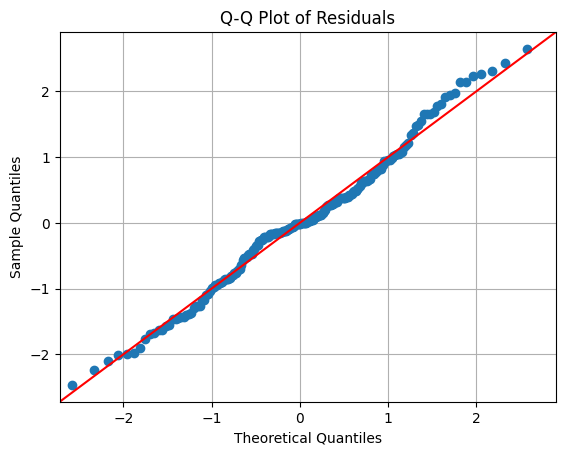

In [ ]:
# Q-Q Plot for Residuals
sns.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()